In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

%reload_ext autoreload
%autoreload 2


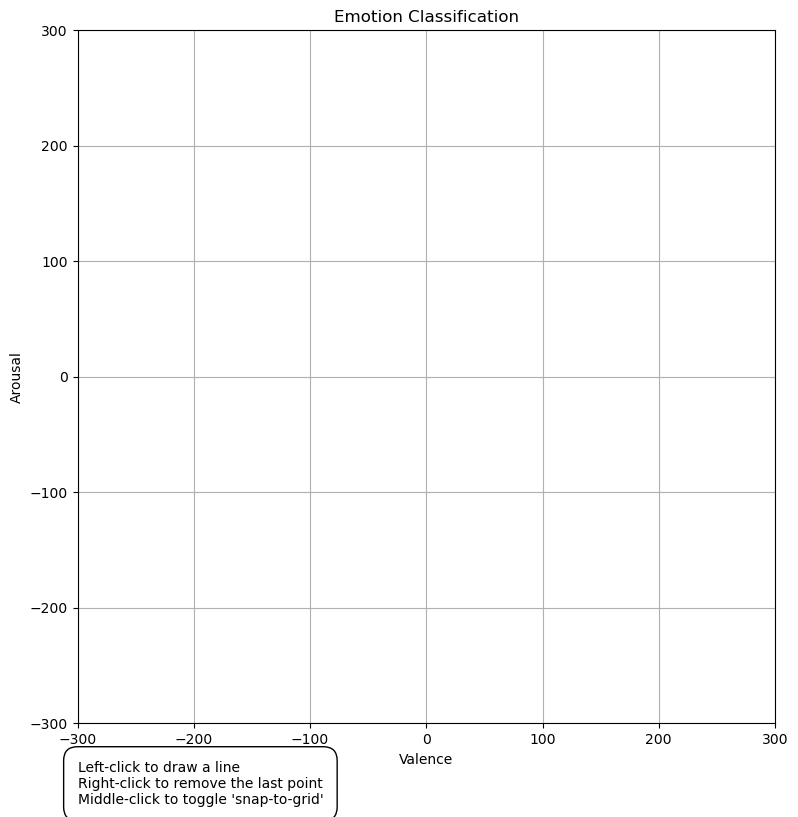

In [17]:
f = plt.figure(figsize=(9, 9))
ax = f.add_subplot()

# initializing the grid
ax.set_xlim(-300, 300)
ax.set_ylim(-300, 300)
ax.xaxis.set_major_locator(plt.AutoLocator())
ax.yaxis.set_major_locator(plt.AutoLocator())
ax.grid()


# labeling
ax.set_xlabel('Valence')
ax.set_ylabel('Arousal')
ax.set_title('Emotion Classification')


# showing a box with information on what clicking does
t1 = ax.text(-300, -370,
             """left-click to draw a line
right-click to remove the last point
middle-click to toggle 'snap-to-grid'""",
             bbox=dict(facecolor='w',
                       edgecolor='black',
                       boxstyle='round, pad=1, rounding_size=1', pad=0))

t2 = ax.text(250, -370,
             """'snap-to-grid active!'""",
             bbox=dict(facecolor='w',
                       edgecolor='red',
                       boxstyle='round, pad=1, rounding_size=1', pad=0))
t2.set_visible(False)


# drawing initial lines that will be updated later
l, = ax.plot([], [], lw=2, marker='o', c='k')
p, = ax.plot([], [], lw=0, marker='.', c='r', alpha=0.25)
p_round, = ax.plot([], [], lw=0, marker='o', c='r')


# getting a dict to store the values needed to change during runtime
retdict = dict(points=[],
               round_to_int=False)


# defining what to do when a mouse-click event is happening
def on_click(event):
    if event.inaxes != ax:
        return
    if event.button == 1:
        if retdict['round_to_int']:
            retdict['points'] += [[round(event.xdata), round(event.ydata)]]
        else:
            retdict['points'] += [[event.xdata, event.ydata]]
    elif event.button == 3:
        if len(retdict['points']) >= 1:
            retdict['points'] = retdict['points'][:-1]
            plt.draw()

    elif event.button == 2:
        retdict['round_to_int'] = not retdict['round_to_int']
        if retdict['round_to_int']:
            t2.set_visible(True)
        else:
            t2.set_visible(False)
        plt.draw()

    if len(retdict['points']) > 0:
        l.set_visible(True)
        l.set_data(list(zip(*retdict['points'])))

        plt.draw()
    else:
        l.set_visible(False)


# defining what to do when a motion-event is detected
def on_move(event):
    if event.inaxes != ax:
        return

    p.set_data(event.xdata, event.ydata)

    if retdict['round_to_int']:
        p_round.set_data(round(event.xdata), round(event.ydata))

    plt.draw()


# connecting the callbacks to the figure
f.canvas.mpl_connect('button_press_event', on_click)
f.canvas.mpl_connect('motion_notify_event', on_move)

Notes:
- snap to grid is there, because a lot of examples used it and it might become useful later on, to reduce the number of posible outcomes or to group stuff

- if you run the code outside of Jupyter Notebook, you want the last line to be: plt.show()
    -otherwise the plot is not shown
    
- interacting and snap-to-grip is not working for me so far on Jupyter, we should be able to do stuff like this:

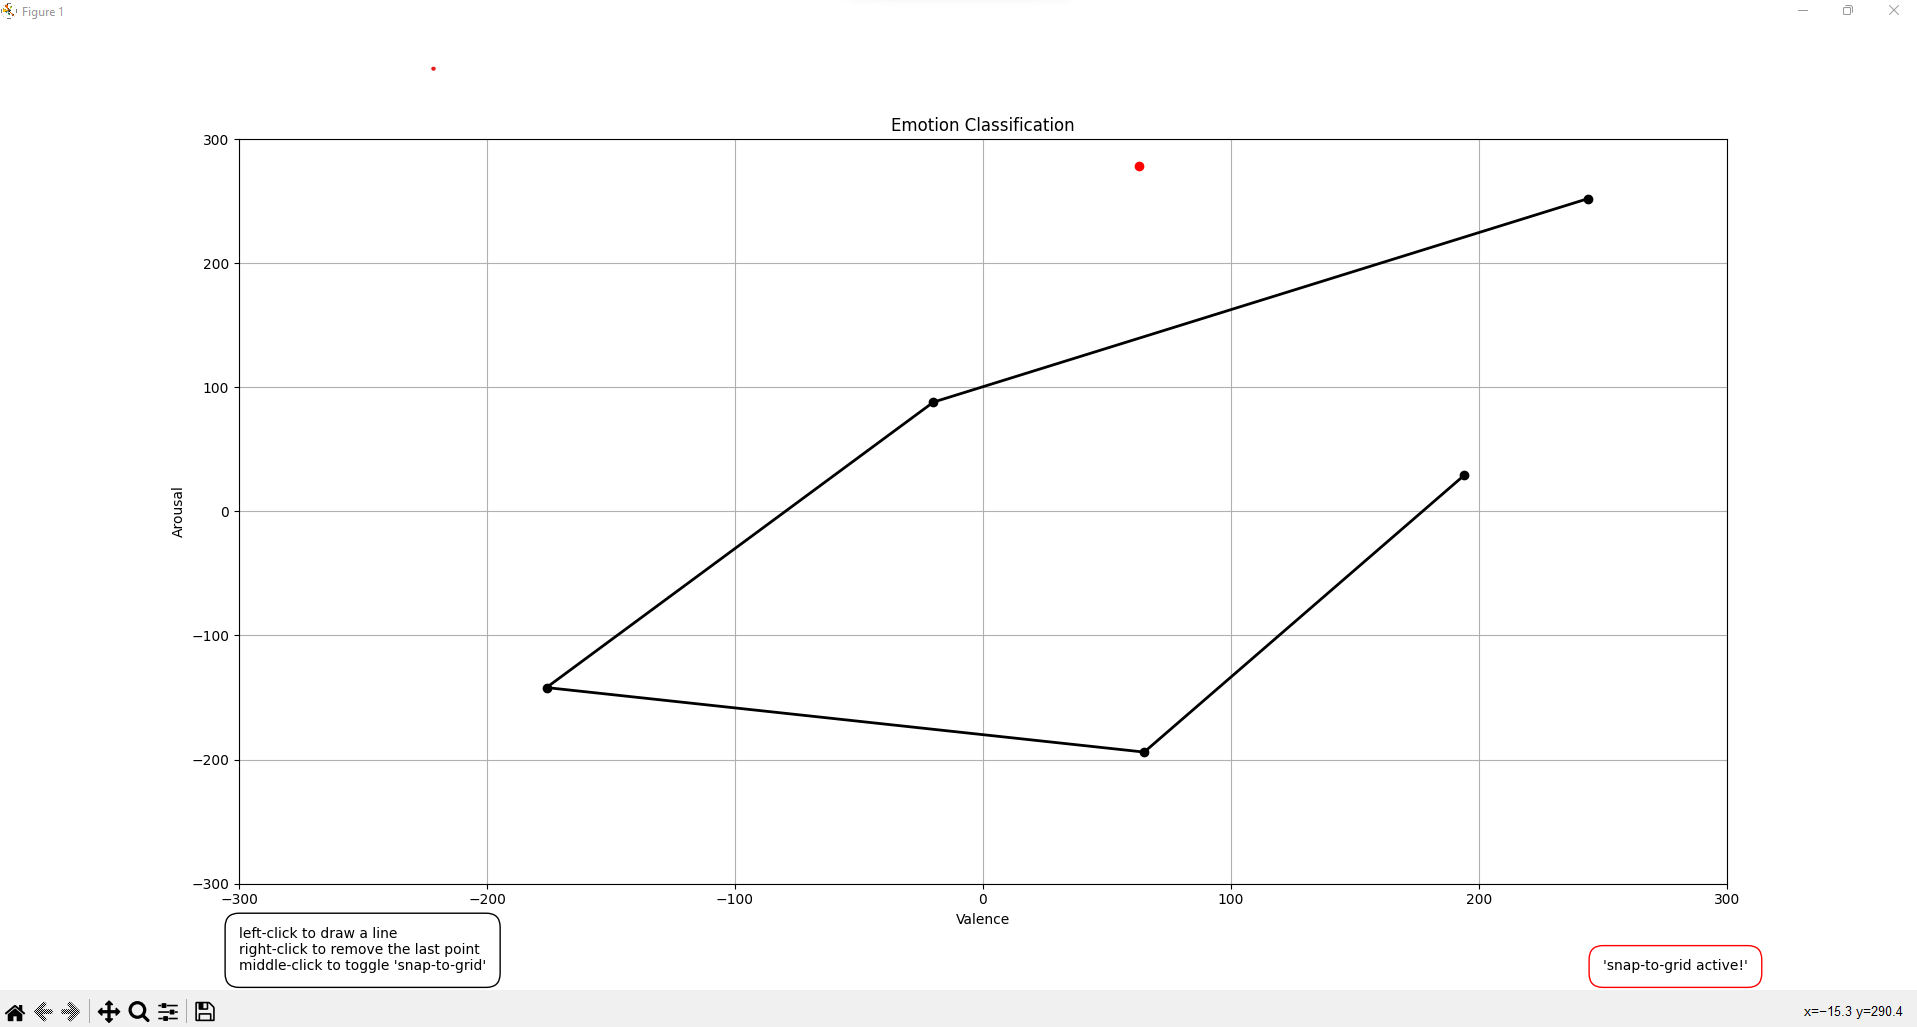